In [3]:
"""
分布分析

分布分析——研究数据的分布特征和分布类型，分定量数据、定性数据区分基本统计量

极差/频率分布情况/ 分组组距及组数

"""

'\n分别分析\n\n分布分析——研究数据的分布特征和分布类型，分定量数据、定性数据区分基本统计量\n\n极差/频率分布情况/ 分组组距及组数\n\n'

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

,房屋编码,小区,朝向,房屋单价,参考首付,参考总价,经度,纬度
0,605093949,大望新平村,南北,5434,15.0,50.0,114.180964,22.603698
1,605768856,通宝楼,南北,3472,7.5,25.0,114.179298,22.566910
2,606815561,罗湖区罗芳村,南北,5842,15.6,52.0,114.158869,22.547223
3,605147285,兴华苑,南北,3829,10.8,36.0,114.158040,22.554343
4,606030866,京基东方都会,西南,47222,51.0,170.0,114.149243,22.554370


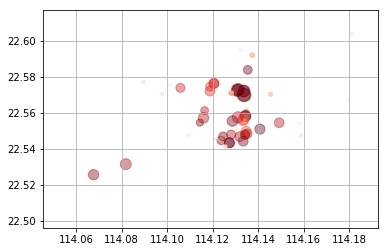

In [23]:
# 读取数据

data = pd.read_csv('C:\\Users\\Administrator\\Desktop\\python\\深圳罗湖二手房信息.csv',engine = 'python')
        # engine: {‘c’, ‘python’}, optional 选择读取的引擎目前来说C更快，但是Python的引擎有更多选择的操作

plt.scatter(data['经度'],
            data['纬度'],
           s = data['房屋单价']/500,
            c = data['参考总价'],
            cmap = 'Reds',
            alpha = 0.4
           )
plt.grid()

data.head()

In [26]:
# 极差

def d_range(df,*cols):
    krange=[]
    for col in cols:
        crange=df[col].max()-df[col].min()
        krange.append(crange)
    return(krange)

key1 = '参考总价'
key2 = '参考首付'

dr = d_range(data,key1,key2)
print("%s极差为:%f,\n%s极差为%f。"%(key1,dr[0],key2,dr[1]))

参考总价极差为:175.000000,
参考首付极差为52.500000。


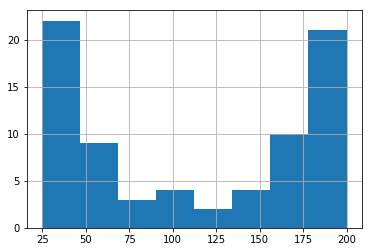

In [31]:
# 频率分布情况

data[key1].hist(bins = 8)
    # .hist 直方图 
    #  bins 箱子格式

In [35]:
# 频率分布情况，分组区间

gcut = pd.cut(data[key1],10,right = False)
#用cut函数将一组数据分割成n份
    #  pandas.cut(x,bins,right=True,labels=None,retbins=False,precision=3,include_lowest=False)
    #  x   :进行划分的一维数组
    #  bins : 1,整数---将x划分为多少个等间距的区间
    #  right :是否包含右端点
    #  labels :是否用标记来代替返回的bins
    #  precision:精度
    # include_lowest:是否包含左端点
gcut_count = gcut.value_counts(sort = False)
    # value_counts()是一种查看表格某列中有多少个不同值的快捷方法，并计算每个不同值有在该列中有多少重复值。
    # value_counts()是Series拥有的方法，一般在DataFrame中使用时，需要指定对哪一列或行使用
    
data['%s分组区间'%key1] = gcut.values
data.head()

,房屋编码,小区,朝向,房屋单价,参考首付,参考总价,经度,纬度,参考总价分组区间
0,605093949,大望新平村,南北,5434,15.0,50.0,114.180964,22.603698,"[42.5, 60.0)"
1,605768856,通宝楼,南北,3472,7.5,25.0,114.179298,22.566910,"[25.0, 42.5)"
2,606815561,罗湖区罗芳村,南北,5842,15.6,52.0,114.158869,22.547223,"[42.5, 60.0)"
3,605147285,兴华苑,南北,3829,10.8,36.0,114.158040,22.554343,"[25.0, 42.5)"
4,606030866,京基东方都会,西南,47222,51.0,170.0,114.149243,22.554370,"[165.0, 182.5)"


In [52]:
# 区间出现频率

r_zj = pd.DataFrame(gcut_count)
r_zj.rename(columns = {gcut_count.name:'频数'},inplace = True)
r_zj['频率'] = r_zj['频数']/r_zj['频数'].sum()
r_zj['累计频率'] = r_zj['频率'].cumsum()
r_zj['频率%'] = r_zj['频率'].apply(lambda x:"%.2f%%" %(x*100))
r_zj['累计频率%'] = r_zj['累计频率'].apply(lambda x:"%.2f%%" %(x*100))
r_zj.style.bar(subset=['频率','累计频率'])
#r_zj

,频数,频率,累计频率,频率%,累计频率%
"[25.0, 42.5)",14,0.186667,0.186667,18.67%,18.67%
"[42.5, 60.0)",17,0.226667,0.413333,22.67%,41.33%
"[60.0, 77.5)",1,0.0133333,0.426667,1.33%,42.67%
"[77.5, 95.0)",2,0.0266667,0.453333,2.67%,45.33%
"[95.0, 112.5)",4,0.0533333,0.506667,5.33%,50.67%
"[112.5, 130.0)",2,0.0266667,0.533333,2.67%,53.33%
"[130.0, 147.5)",3,0.04,0.573333,4.00%,57.33%
"[147.5, 165.0)",4,0.0533333,0.626667,5.33%,62.67%
"[165.0, 182.5)",8,0.106667,0.733333,10.67%,73.33%
"[182.5, 200.175)",20,0.266667,1,26.67%,100.00%


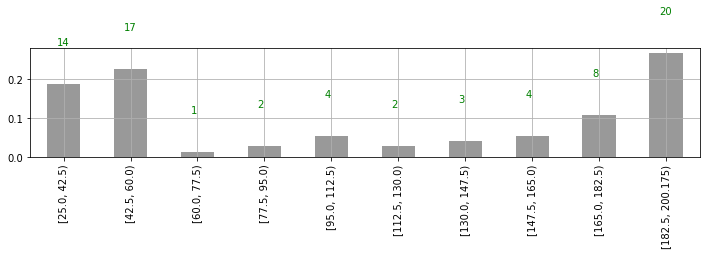

In [58]:
# 直方图

r_zj['频率'].plot(kind = 'bar',
               figsize =(12,2),
               grid = True,
                color ='k',
                alpha=0.4
               )

x = len(r_zj)
y = r_zj['频率']
m = r_zj['频数']
for i,j,k in zip(range(x),y,m):
    plt.text(i-0.1,j+0.1,"%i" %k,color='g')
# 添加频数标签


In [74]:
# 频率分布， 定性字段

cx_g = data['朝向'].value_counts(sort = True)
r_cx = pd.DataFrame(cx_g)

r_cx.rename(columns={cx_g.name:'频数'},inplace = True)
r_cx['频率'] = r_cx['频数']/r_cx['频数'].sum()
r_cx['累计频率'] = r_cx['频率'].cumsum()
r_cx['频率%'] = r_cx['频率'].apply(lambda x:'%.2f%%'%(x*100))
r_cx['累计频率%'] = r_cx['累计频率'].apply(lambda x:'%.2f%%'%(x*100))
r_cx.style.bar(subset=['频率','累计频率'],color='#d65f5f',width=100)

,频数,频率,累计频率,频率%,累计频率%
南北,29,0.386667,0.386667,38.67%,38.67%
南,20,0.266667,0.653333,26.67%,65.33%
东,8,0.106667,0.76,10.67%,76.00%
东南,5,0.0666667,0.826667,6.67%,82.67%
北,4,0.0533333,0.88,5.33%,88.00%
西南,4,0.0533333,0.933333,5.33%,93.33%
西北,3,0.04,0.973333,4.00%,97.33%
东北,1,0.0133333,0.986667,1.33%,98.67%
东西,1,0.0133333,1,1.33%,100.00%


(-1.1101621526291232,
 1.1004839130571389,
 -1.1062755172910221,
 1.1205348076125872)

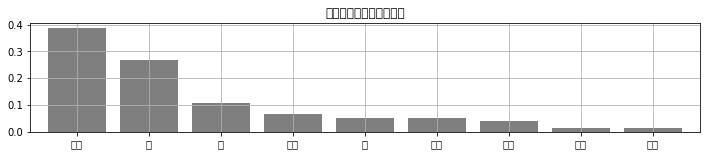

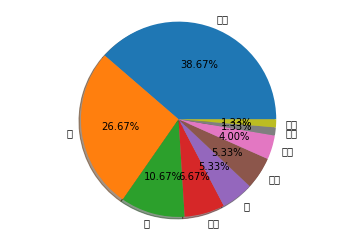

In [78]:
#  频率分布情况 —定量字段
#  绘制频率直方图，饼图

# 绘制直方图
plt.figure(num =1,figsize=(12,2))
r_cx['频率'].plot(kind = 'bar',
               width =0.8,
               rot = 0,
               color ='k',
               grid =True,
                alpha =0.5
               )
plt.title('参考总价分布频率直方图')

# 绘制饼图

plt.figure(num = 2)
plt.pie(r_cx['频数'],
       labels = r_cx.index,
        autopct = '%.2f%%',
        shadow = True
       )
plt.axis('equal')